In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata
from sklearn.decomposition import PCA
from kneed import KneeLocator

# sittings
sns.set_style("ticks",{'axes.grid' : True})
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

# Load the data
read_10x_mtx will compile the 3 files you have with prefix `GSM6204109_P01_` into one AnnData object with n_obs × n_vars
* n_obs: barcodes
* n_vars: genes

In [34]:
# Read the data into an AnnData object
adata = sc.read_10x_mtx('data/GSE205013_RAW/', cache=True, prefix='GSM6204109_P01_')

# In case variable names are not unique this line makes them unique
# adata.var_names_make_unique()

adata

... reading from cache file cache/data-GSE205013_RAW-GSM6204109_P01_matrix.h5ad


AnnData object with n_obs × n_vars = 7254 × 36601
    var: 'gene_ids', 'feature_types'

# Print the AnnData in the form of a dataframe

In [3]:
# Print the AnnData in the form of a dataframe
adata_dataframe = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
adata_dataframe

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.5,AL627309.4,AP006222.2,AL732372.1,...,AC133551.1,AC136612.1,AC136616.1,AC136616.3,AC136616.2,AC141272.1,AC023491.2,AC007325.1,AC007325.4,AC007325.2
AAACCCAAGGTGGCTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAAGTTTCGGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACAACCCTAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCACAAGCGCAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCCAGTATCGATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTTGAAAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCAACGAGG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCAGGCGAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTTGTCCTGCCAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Basic filtering
* Filter out any cell that has less than 200 genes
* Filter out any gene expresed by less than 3 cells

In [35]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=3)

adata

filtered out 774 cells that have less than 500 genes expressed
filtered out 13003 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 6480 × 23598
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells'

# Explore the counts of the genes

normalizing counts per cell
    finished (0:00:00)


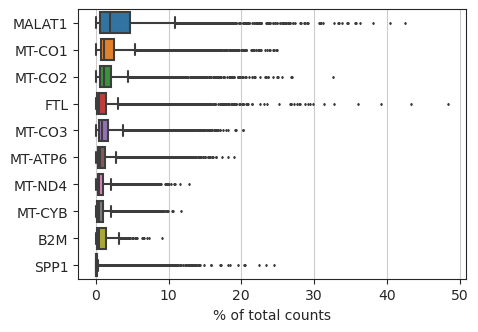

The fraction of non-zero counts = 0.0671


In [5]:
# Show genes that yield highest fraction of counts
sc.pl.highest_expr_genes(adata, n_top=10)

# What is the fraction of non-zero entries in the matrix?
non_zero_counts = adata_dataframe.astype(bool).sum().sum()/np.prod(adata_dataframe.shape)
print(f'The fraction of non-zero counts = {non_zero_counts:.4f}')

# Annotate mitochondrial genes as 'mt' and the ribosomal genes as 'ribo'
* Mitochondrial genes are taged with MT for human genes
* Ribosomal genes are not taged, so you have to compare the genes to a list of known ribosomal genes.

Ribosomal genes can be downloaded as csv from: https://www.gsea-msigdb.org/gsea/msigdb/human/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=CSV

In [6]:
# Annotate the metacondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-')

# How many different mitochondrial genes were observed?
print(f"Number of observed mitochondrial genes = {adata.var['mt'].sum()}")

# Read the list of ribosomal genes (88 genes) from a csv file
ribosomal_genes = pd.read_csv('data/KEGG_RIBOSOME.v2023.1.Hs.csv', skiprows=2, header=None)[0].values

# Annotate the ribosomal genes
adata.var['ribo'] = adata.var_names.isin(ribosomal_genes)

# How many different ribosomal genes were observed?
print(f"Number of observed ribosomal genes = {adata.var['ribo'].sum()}")

Number of observed mitochondrial genes = 13
Number of observed ribosomal genes = 86


# Calculate the quality control metrics

In [7]:
# Calculate the QC metrics with respect to metacondrial and ribosomal genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

# Violin and histogram plots of some QC metrics
* Number of genes expressed in the count matrix
* Total counts per cell
* Percentage of counts in mitochondrial genes
* Percentage of counts in ribosomal genes

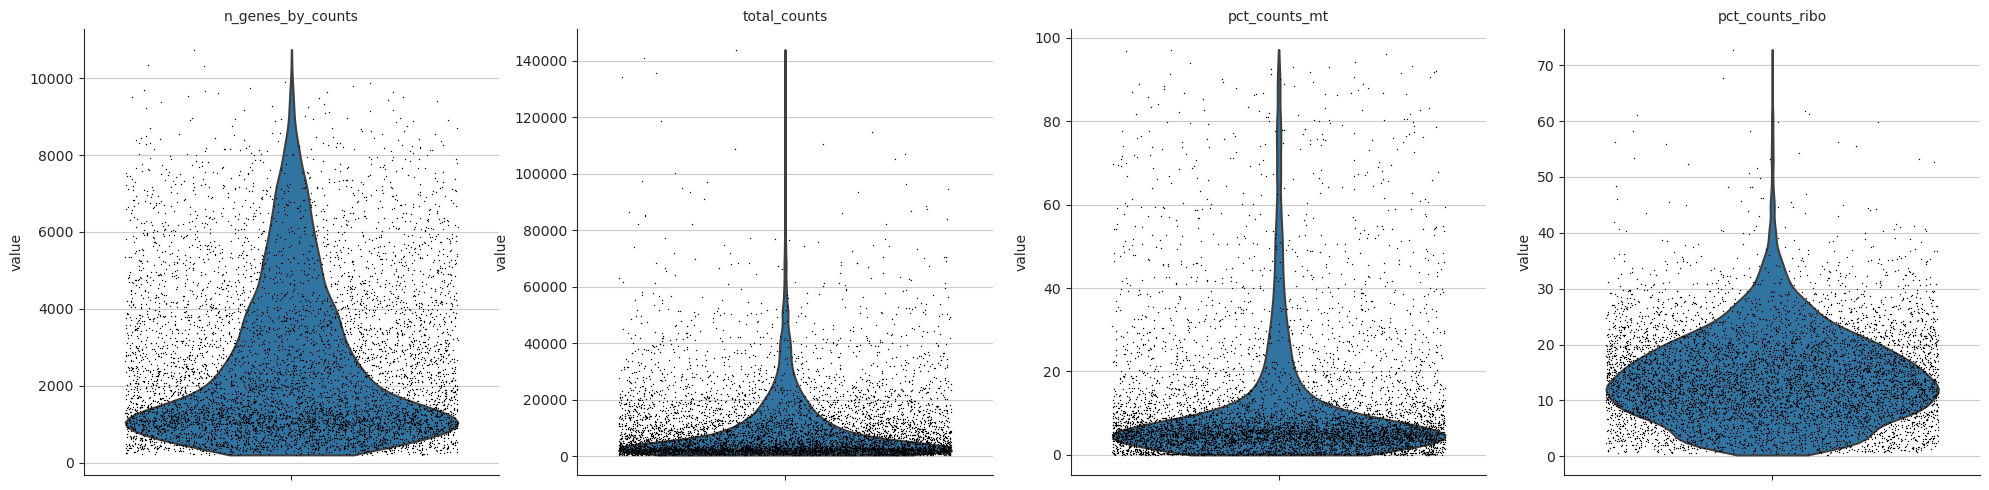

In [8]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], jitter=0.4, multi_panel=True)

<Axes: xlabel='pct_counts_ribo', ylabel='Count'>

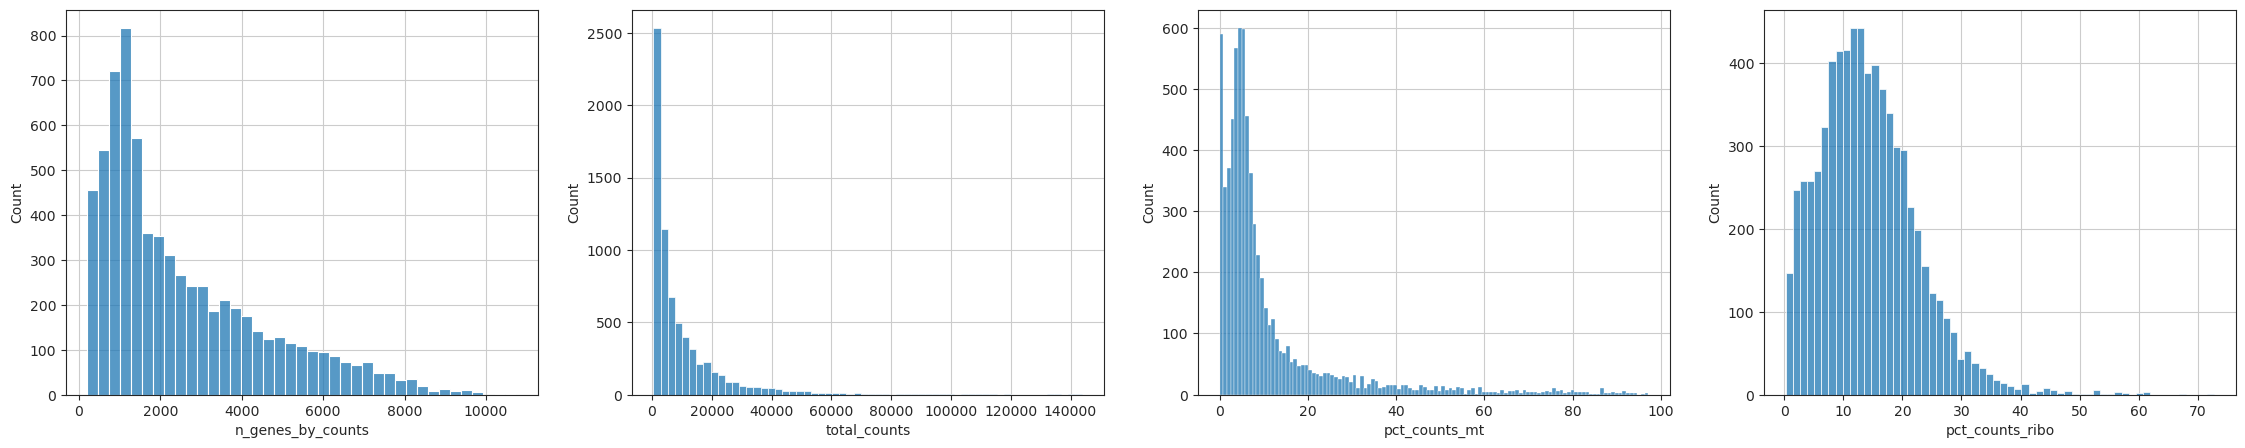

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(28,5))
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["total_counts"], kde=False, bins=60, ax=axs[1])
sns.histplot(adata.obs["pct_counts_mt"], kde=False, ax=axs[2])
sns.histplot(adata.obs["pct_counts_ribo"], kde=False, bins=60, ax=axs[3])

## Scatter plots of QC metrics

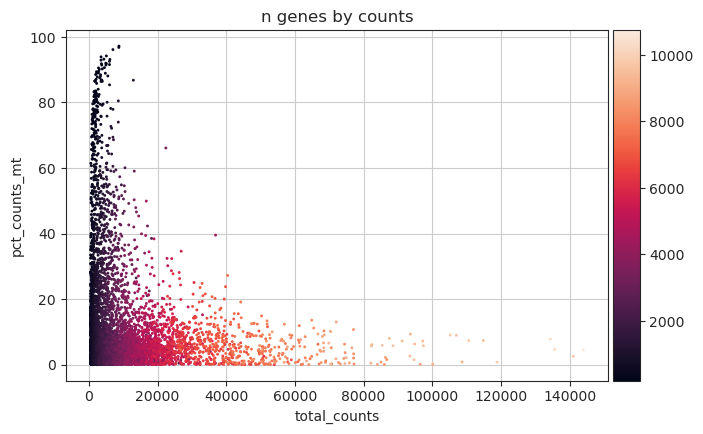

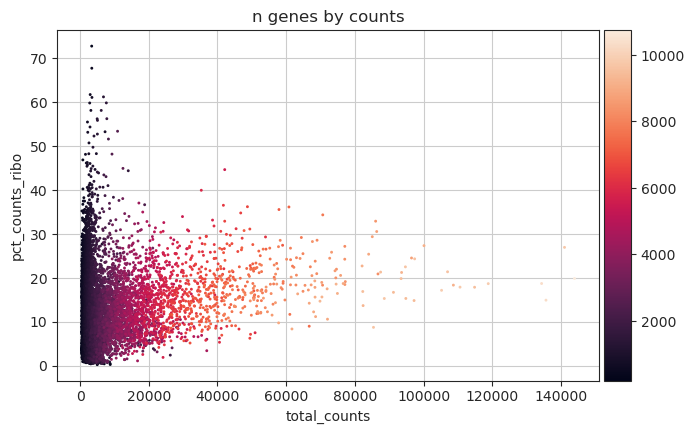

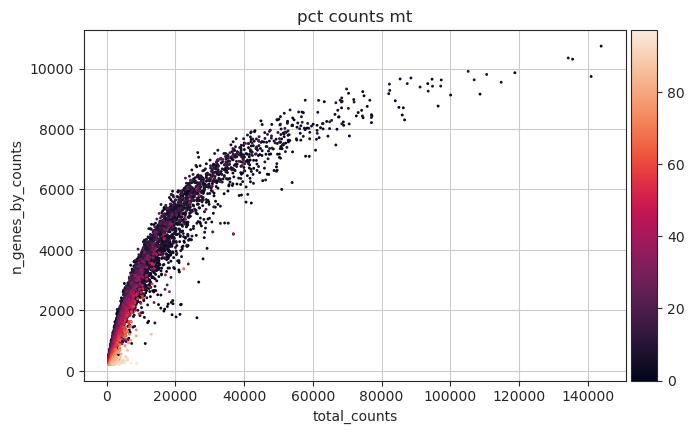

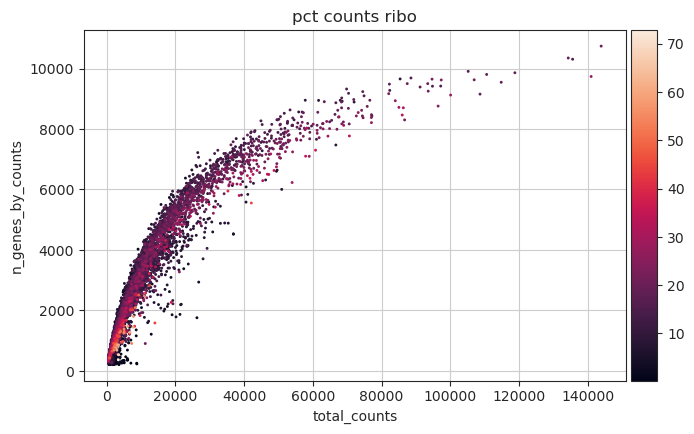

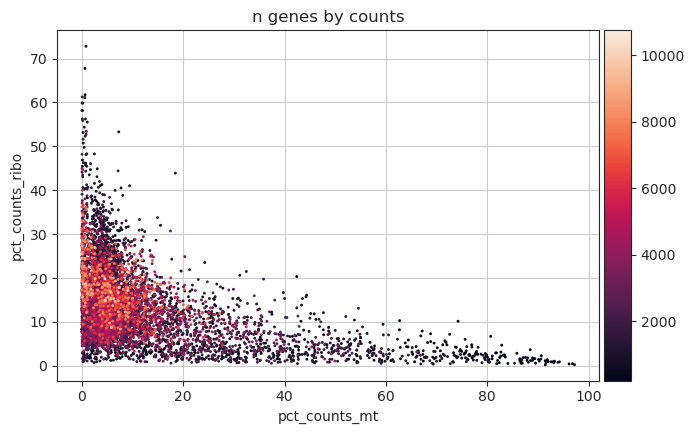

In [10]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color = 'n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo', color = 'n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_ribo')
sc.pl.scatter(adata, x='pct_counts_mt', y='pct_counts_ribo', color = 'n_genes_by_counts')

# Filtering the low quality data

In [11]:
total_counts_threshold = np.quantile(adata.obs.total_counts.values, .98)
total_counts_threshold

50974.640000000014

In [12]:
# Adjust a threshould to filter out layers
n_genes_by_counts_threshold = np.quantile(adata.obs.n_genes_by_counts.values, .98)
total_counts_threshold = np.quantile(adata.obs.total_counts.values, .98)
pct_counts_ribo_threshold = np.quantile(adata.obs.pct_counts_ribo.values, .99)

# Filter out the out layers cells that has too high number of genes expressed
adata = adata[adata.obs.n_genes_by_counts < n_genes_by_counts_threshold, :]
adata = adata[adata.obs.total_counts < total_counts_threshold, :]

# Filter out the out layers cells that has too high metaconderial genes percentage
adata = adata[adata.obs.pct_counts_mt < 20, :]

# Filter out the out layers cells that has too high ribosomal genes percentage
adata = adata[adata.obs.pct_counts_ribo < pct_counts_ribo_threshold]

adata

View of AnnData object with n_obs × n_vars = 5736 × 23650
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

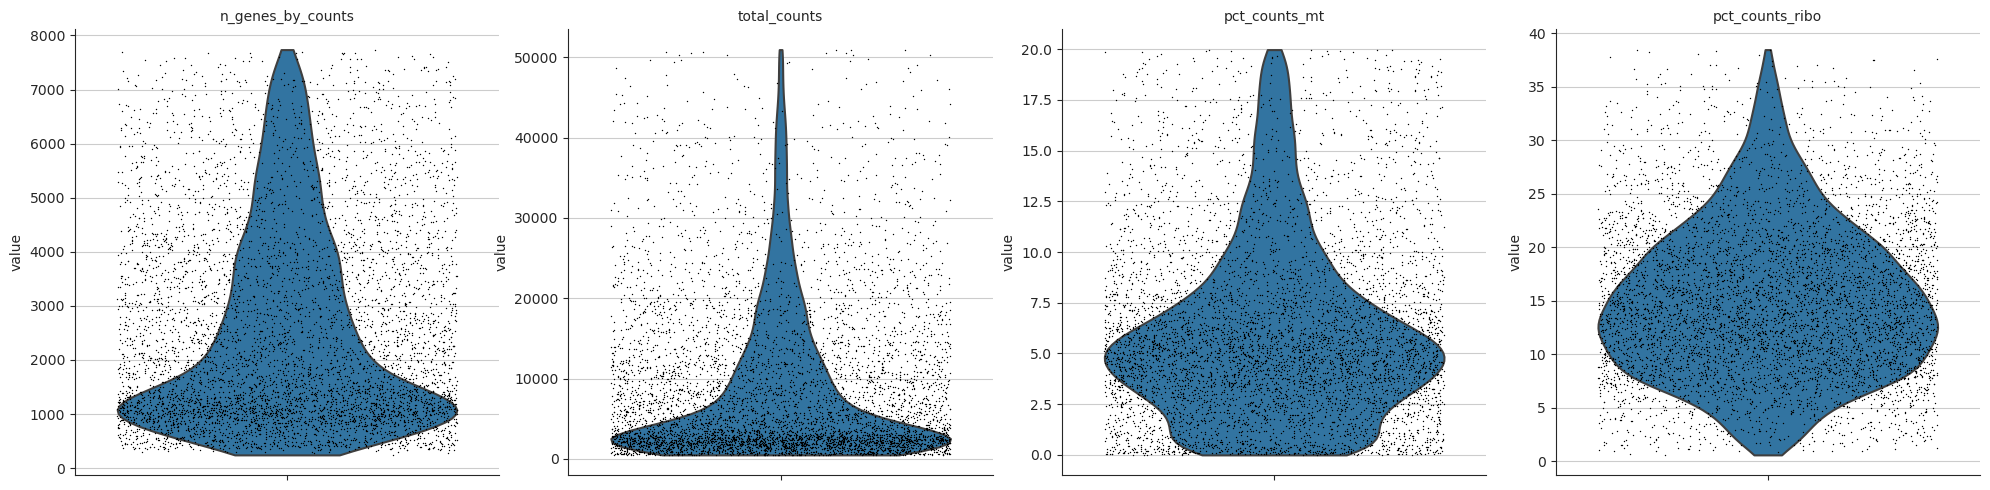

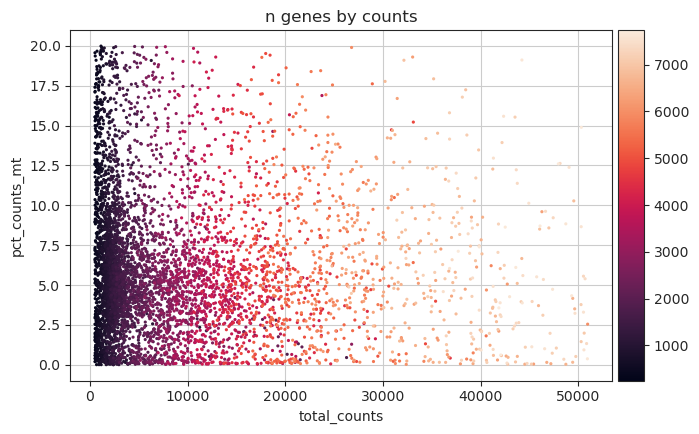

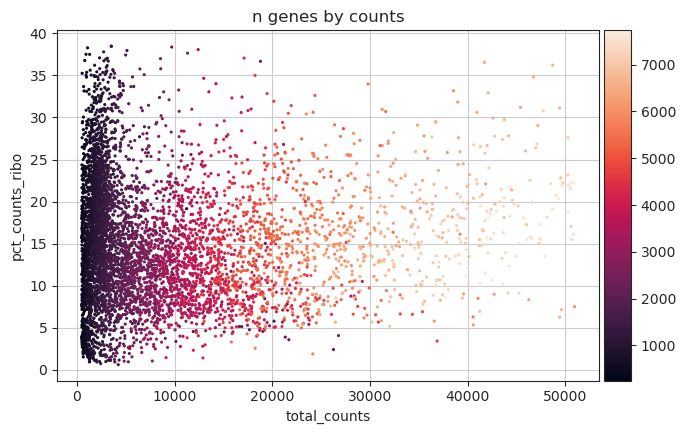

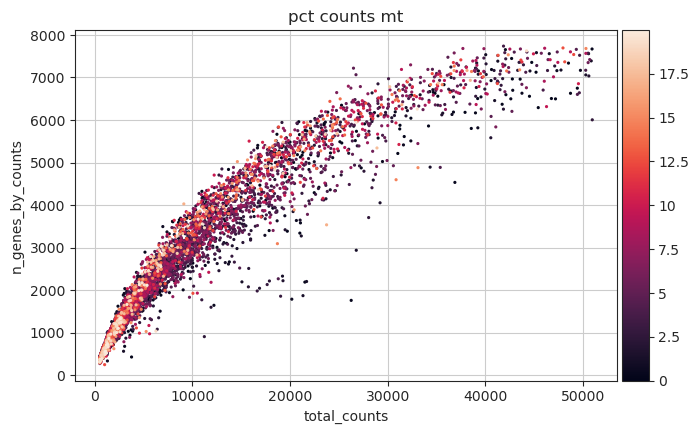

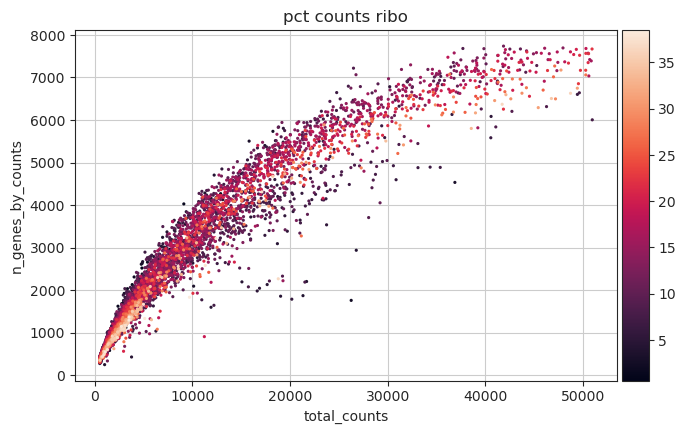

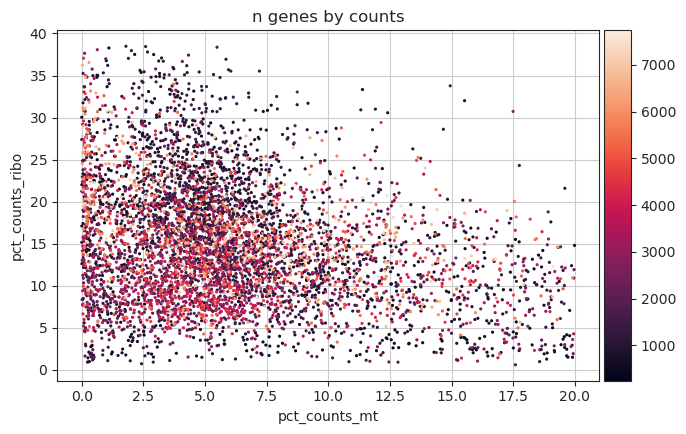

In [13]:
# Violin and histogram plots of some QC metrics
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], jitter=0.4, multi_panel=True)

# Scatter plots of QC metrics
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color = 'n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo', color = 'n_genes_by_counts')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color = 'pct_counts_ribo')
sc.pl.scatter(adata, x='pct_counts_mt', y='pct_counts_ribo', color = 'n_genes_by_counts')

# Normalize the data then take the logarithm

In [14]:
# Normalize counts to 10,000 reads per cell..
sc.pp.normalize_total(adata, target_sum=1e4)

# Logarithm the data using log n+1 transform
sc.pp.log1p(adata)

adata

normalizing counts per cell
    finished (0:00:00)


/home/ahmed/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 5736 × 23650
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p'

# Identify the Highly Variable Genes (HVGs)

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


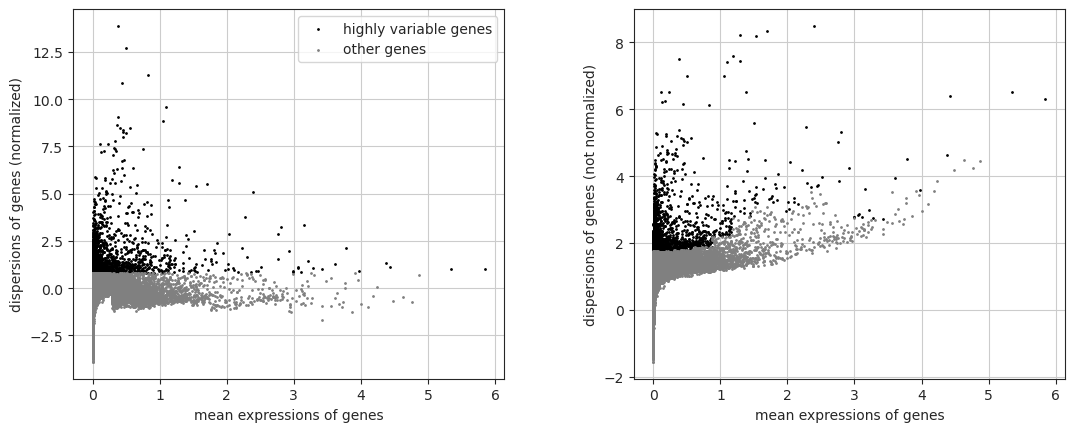

In [15]:
# Select the top 3000 HVGs
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=3000)

# Plot dispersion vs expression
sc.pl.highly_variable_genes(adata)

# Dimension reduction 
* Filtering out the low variable genes
* Apply principal component analysis (PCA)

In [16]:
# Filter out the low variable genes
adata = adata[:, adata.var.highly_variable]

# Regress out unwanted sources of variation (Can be harmful if you have many cell types)
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

# Scale to unit variance for PCA, clip values exceding var 10
sc.pp.scale(adata, max_value=10)

# Reduce the dimensionality of the data using PCA
sc.tl.pca(adata, svd_solver='arpack', n_comps=100)

adata

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=100


/home/ahmed/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:01)


AnnData object with n_obs × n_vars = 5736 × 3000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

# How many PCs should we use to cluster?

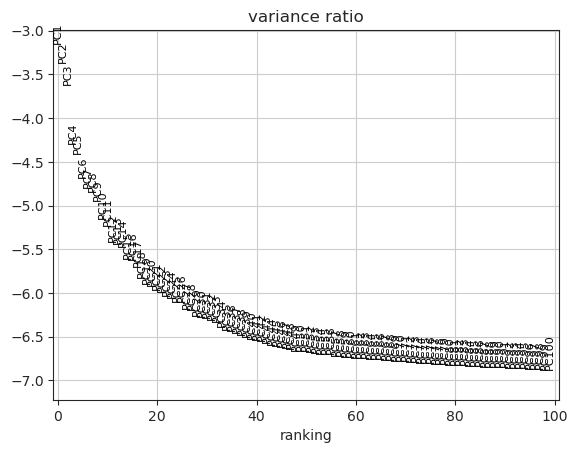

In [17]:
# visualize screen plot
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=100)

# Finds the elbow dimension of the scree plot

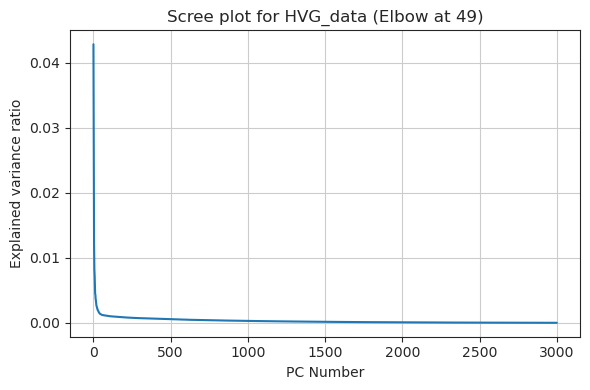

In [18]:
# Define the pca object
pca = PCA()

# Fit the PCA model on the extracted values from the HVGs dataframe
model = pca.fit(adata.X)

# Compute the explained variance for each gene
explained_variance = model.explained_variance_ratio_

# Enumerate the PC with the same dimension as the explained variance
pcs = list(range(1,explained_variance.shape[0]+1))

# Determine the number of PCs using KneeLocator then list them
kneelocator = KneeLocator(pcs, explained_variance, S=1.0, curve='convex', direction='decreasing')
n_pcs_used = kneelocator.knee

# Plot how many PCs should be used
plt.figure(figsize = (6,4))
plt.plot(pcs, explained_variance)
plt.title(f"Scree plot for HVG_data (Elbow at {n_pcs_used})")
plt.xlabel("PC Number")
plt.ylabel("Explained variance ratio")
plt.tight_layout()

# Computing the neighborhood graph

In [19]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=n_pcs_used)

computing neighbors
    using 'X_pca' with n_pcs = 49


/home/ahmed/anaconda3/envs/scrna/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ahmed/anaconda3/envs/scrna/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ahmed/anaconda3/envs/scrna/lib/python3.11/site-packages/umap/distanc

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


# Visualizing data with umap

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


/home/ahmed/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


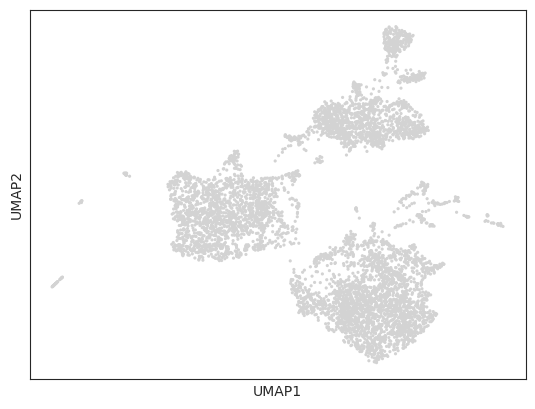

In [20]:
# Calculate the umap
sc.tl.umap(adata)

# Plot the umap
sc.pl.umap(adata)

# Clustering the neighborhood graph using leiden algorithm

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/ahmed/anaconda3/envs/scrna/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


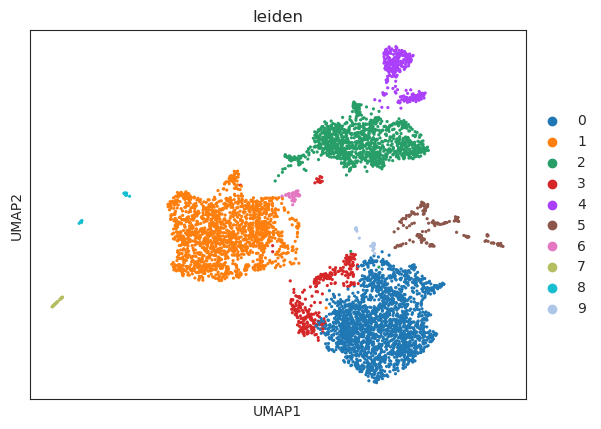

In [33]:
# Run leiden clustering
sc.tl.leiden(adata, resolution = 0.24)

# Plot the clusters using umap
sc.pl.umap(adata, color=['leiden'])

In [22]:
adata

AnnData object with n_obs × n_vars = 5736 × 3000
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [23]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
AAACCCAAGGTGGCTA-1,1205,1205,2553.0,159.0,6.227967,340.0,13.317665,2
AAACCCAAGTTTCGGT-1,1084,1084,2959.0,173.0,5.846570,1093.0,36.938156,2
AAACCCACAACCCTAA-1,4713,4713,16327.0,789.0,4.832486,3312.0,20.285418,0
AAACCCAGTATCGATC-1,2008,2006,3951.0,194.0,4.910150,504.0,12.756264,5
AAACCCAGTCAAACGG-1,6504,6504,28977.0,1450.0,5.003969,3213.0,11.088104,0
...,...,...,...,...,...,...,...,...
TTTGTTGGTTTGAAAG-1,1053,1053,1994.0,80.0,4.012036,453.0,22.718153,2
TTTGTTGTCAACGAGG-1,1292,1292,2803.0,94.0,3.353550,165.0,5.886550,1
TTTGTTGTCAGGCGAA-1,2083,2083,5832.0,338.0,5.795610,511.0,8.762003,1
TTTGTTGTCCTGCCAT-1,1297,1297,2573.0,287.0,11.154295,444.0,17.256121,0
